# Body Shapes
This script reads in a CSV file and calculates the shape of an individual based on their bust, waist and hip measurements. It add their body shape to a new column in the CSV file.

In [26]:
import pandas as pd
from shapes_calculator import calculate_shape
import matplotlib.pyplot as plt

In [27]:
# testing that imported function works
print(calculate_shape(34, 26, 36))

triangle


In [28]:
# store CSV file as DataFrame

df = pd.read_csv('Data/style_blogger_index.csv')
df.head()

,Timestamp,Blog/Instagram Account Name,Blog/Instagram Account Link(s),Dress size (US),Shoe size (US),Age Range,Height (feet/inches),Bust (inches),Waist (inches),Hip (inches),Describe your style:,"Are you interested in buying, selling, or swapping clothes?",Location,Profession,Race/Ethnicity,Comments,Email Address,Waist:Hip Ratio,Height in inches
0,11/25/2020 13:58,ilsaengel,https://www.instagram.com/ilsaengel/,12,7,30-34,5'1,43.0,32.0,43.0,"artsy, maximalist, vintage",Yes,"Austin, TX","Academia/Research, Arts/Architecture/Design, S...","White, Jewish",NaN,NaN,NaN,NaN
1,11/25/2020 11:32,AJ Wears Clothes,https://instagram.com/ajwearsclothes,"6, 8",7.5,35-39,5'2,36.0,29.0,40.0,"business-casual, comfy, feminine, trendy",Yes,"Little Rock, AR, USA",Marketing/Sales,White,NaN,NaN,NaN,NaN
2,11/25/2020 0:36,Electric Bones,https://instagram.com/electric.bones,0,6.5,25-29,5'7,34.0,24.0,32.0,"dark, eclectic, thrifted",Yes,"Phoenix, AZ, USA",Marketing/Sales,White,NaN,NaN,0.75,NaN
3,11/25/2020 0:29,Katherine Rose,https://kat-rose.com/,"00, 0",8,30-34,5'4,32.0,24.0,33.0,"casual, chic, classic, feminine, minimalist, m...",Yes,"Berkeley, CA, USA","Administrative, Other (you can specify in the ...",White,NaN,NaN,0.73,NaN
4,11/24/2020 23:44,mirrorselfiefashionblogger,https://www.instagram.com/mirrorselfiefashionb...,"8, 10",10.5N,20-24,5'10,36.0,29.0,38.0,"chic, comfy, modern, polished, practical, trendy",No,NaN,Other (you can specify in the last question),Southeast Asian,I work in media!,NaN,0.76,NaN


In [29]:
# get overview of data to see if there are missing values - we are missing some values for bust/waist/hip
df.count()

Timestamp                                                      598
Blog/Instagram Account Name                                    598
Blog/Instagram Account Link(s)                                 598
Dress size (US)                                                597
Shoe size (US)                                                 490
Age Range                                                      597
Height (feet/inches)                                           595
Bust (inches)                                                  548
Waist (inches)                                                 543
Hip (inches)                                                   537
Describe your style:                                           591
Are you interested in buying, selling, or swapping clothes?    248
Location                                                       583
Profession                                                     587
Race/Ethnicity                                                

In [32]:
# Drop empty cells at bottom
df.dropna(subset=['Timestamp'], inplace=True)
df.head()

,Timestamp,Blog/Instagram Account Name,Blog/Instagram Account Link(s),Dress size (US),Shoe size (US),Age Range,Height (feet/inches),Bust (inches),Waist (inches),Hip (inches),Describe your style:,"Are you interested in buying, selling, or swapping clothes?",Location,Profession,Race/Ethnicity,Comments,Email Address,Waist:Hip Ratio,Height in inches,Shape
0,11/25/2020 13:58,ilsaengel,https://www.instagram.com/ilsaengel/,12,7,30-34,5'1,43.0,32.0,43.0,"artsy, maximalist, vintage",Yes,"Austin, TX","Academia/Research, Arts/Architecture/Design, S...","White, Jewish",NaN,NaN,NaN,NaN,hourglass
1,11/25/2020 11:32,AJ Wears Clothes,https://instagram.com/ajwearsclothes,"6, 8",7.5,35-39,5'2,36.0,29.0,40.0,"business-casual, comfy, feminine, trendy",Yes,"Little Rock, AR, USA",Marketing/Sales,White,NaN,NaN,NaN,NaN,triangle
2,11/25/2020 0:36,Electric Bones,https://instagram.com/electric.bones,0,6.5,25-29,5'7,34.0,24.0,32.0,"dark, eclectic, thrifted",Yes,"Phoenix, AZ, USA",Marketing/Sales,White,NaN,NaN,0.75,NaN,hourglass
3,11/25/2020 0:29,Katherine Rose,https://kat-rose.com/,"00, 0",8,30-34,5'4,32.0,24.0,33.0,"casual, chic, classic, feminine, minimalist, m...",Yes,"Berkeley, CA, USA","Administrative, Other (you can specify in the ...",White,NaN,NaN,0.73,NaN,hourglass
4,11/24/2020 23:44,mirrorselfiefashionblogger,https://www.instagram.com/mirrorselfiefashionb...,"8, 10",10.5N,20-24,5'10,36.0,29.0,38.0,"chic, comfy, modern, polished, practical, trendy",No,NaN,Other (you can specify in the last question),Southeast Asian,I work in media!,NaN,0.76,NaN,triangle


In [33]:
# Create new column to store shape in
df['Shape'] = ''

# Review measurements, determine shape and store shape in DataFrame column 'Shape'
for index, row in df.iterrows():
    try:
        shape = calculate_shape(row['Bust (inches) '], row['Waist (inches)'], row['Hip (inches)'])
        df.loc[index, 'Shape'] = shape
    except: 
        df.loc[index, 'Shape'] = None
df.head()

,Timestamp,Blog/Instagram Account Name,Blog/Instagram Account Link(s),Dress size (US),Shoe size (US),Age Range,Height (feet/inches),Bust (inches),Waist (inches),Hip (inches),Describe your style:,"Are you interested in buying, selling, or swapping clothes?",Location,Profession,Race/Ethnicity,Comments,Email Address,Waist:Hip Ratio,Height in inches,Shape
0,11/25/2020 13:58,ilsaengel,https://www.instagram.com/ilsaengel/,12,7,30-34,5'1,43.0,32.0,43.0,"artsy, maximalist, vintage",Yes,"Austin, TX","Academia/Research, Arts/Architecture/Design, S...","White, Jewish",NaN,NaN,NaN,NaN,hourglass
1,11/25/2020 11:32,AJ Wears Clothes,https://instagram.com/ajwearsclothes,"6, 8",7.5,35-39,5'2,36.0,29.0,40.0,"business-casual, comfy, feminine, trendy",Yes,"Little Rock, AR, USA",Marketing/Sales,White,NaN,NaN,NaN,NaN,triangle
2,11/25/2020 0:36,Electric Bones,https://instagram.com/electric.bones,0,6.5,25-29,5'7,34.0,24.0,32.0,"dark, eclectic, thrifted",Yes,"Phoenix, AZ, USA",Marketing/Sales,White,NaN,NaN,0.75,NaN,hourglass
3,11/25/2020 0:29,Katherine Rose,https://kat-rose.com/,"00, 0",8,30-34,5'4,32.0,24.0,33.0,"casual, chic, classic, feminine, minimalist, m...",Yes,"Berkeley, CA, USA","Administrative, Other (you can specify in the ...",White,NaN,NaN,0.73,NaN,hourglass
4,11/24/2020 23:44,mirrorselfiefashionblogger,https://www.instagram.com/mirrorselfiefashionb...,"8, 10",10.5N,20-24,5'10,36.0,29.0,38.0,"chic, comfy, modern, polished, practical, trendy",No,NaN,Other (you can specify in the last question),Southeast Asian,I work in media!,NaN,0.76,NaN,triangle


In [34]:
# Store index with added shape column as csv
df.to_csv('Data/style_blogger_index_shapes.csv', index=False)

In [35]:
# Check that shapes stored properly
df['Shape'].unique()

array(['hourglass', 'triangle', 'rectangle', 'inverted triangle', None],
      dtype=object)

In [36]:
# Count number of each type of shape
shape_counts = df['Shape'].value_counts()
shape_counts

triangle             359
rectangle            126
hourglass             44
inverted triangle      6
Name: Shape, dtype: int64

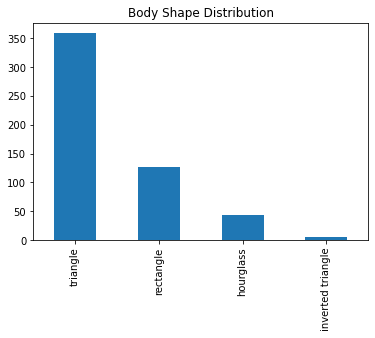

In [37]:
# Plot this information as bar graph
shape_counts.plot(kind='bar')
plt.title('Body Shape Distribution')
plt.show()